In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


In [2]:
train=pd.read_csv('../input/quora-question-pairs/train.csv.zip')
test=pd.read_csv('../input/quora-question-pairs/test.csv')

In [3]:
train.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
train.shape

(404290, 6)

In [5]:
test.head(5)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
test.shape

(2345796, 3)

In [7]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.shape

(404287, 6)

In [10]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

# EDA

In [11]:
train.head(4)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0


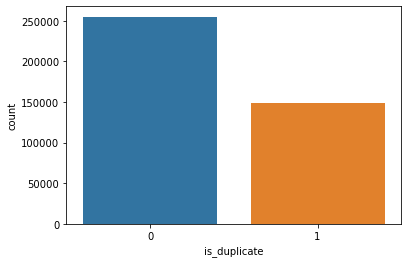

In [12]:
sns.countplot(train['is_duplicate'])

In [13]:
# load stop words
stop_word = stopwords.words('english')

In [14]:
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def clean_data(data):
   # data=data.lower()
    data=re.sub(r'[^(a-zA-Z)\s]','',data)
    #data remove urls
    data=re.sub(r'http\S+','',data)
    #remove mentions
    data=re.sub(r'@\w+','',data)
    #remove hastag
    data=re.sub(r'#\w+',' ',data)
    #remove digits
    data=re.sub(r'\d+','',data)
    #remove html tag or number
    data=re.sub('<.*?>','',data)
    #remove stopwords
    data=data.split()
    data=''.join([word for word in data if not word in stop_word])
    return data

In [16]:
def clean_data(data):
    data = data.lower()
    data = re.sub(r'[^(a-zA-Z)\s]','', data)
     #     remove urls
    data = re.sub(r'http\S+', " ", data)
 #     remove mentions
    data = re.sub(r'@\w+',' ',data)
 #     remove hastags
    data = re.sub(r'#\w+', ' ',data)
#     remove digits
    data = re.sub(r'\d+()', ' ', data)
#     remove html tags and umber
    data = re.sub('r<.*?>',' ', data)
 #     remove stop words 
    data = data.split()
    data = " ".join([word for word in data if not word in stop_word])
    return data

In [17]:
train['question1'] = train['question1'].apply(lambda x:clean_data(x))
train['question2']=train['question2'].apply(lambda x:clean_data(x))

In [18]:
train.head(2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor (kohinoor) diamond,would happen indian government stole kohinoor ...,0


In [19]:
len(train)

404287

In [20]:
max_nb_words=40000
tokenizer=Tokenizer(num_words=max_nb_words)
tokenizer.fit_on_texts(list(train['question1'].values.astype(str))+list(train['question2'].values.astype(str)))

In [21]:
# X_train_q1 = tokenizer.texts_to_sequences(np.array(listq1))
X_train_q1 = tokenizer.texts_to_sequences(train['question1'].values.astype(str))
X_train_q1 = pad_sequences(X_train_q1, maxlen = 30, padding='post')

# X_train_q2 = tokenizer.texts_to_sequences(np.array(listq2))
X_train_q2 = tokenizer.texts_to_sequences(train['question2'].values.astype(str))
X_train_q2 = pad_sequences(X_train_q2, maxlen = 30, padding='post')

In [22]:
train

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,step step guide invest share market india,step step guide invest share market,0
1,1,3,4,story kohinoor (kohinoor) diamond,would happen indian government stole kohinoor ...,0
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0
3,3,7,8,mentally lonely solve,find remainder mathmath divided,0
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0
...,...,...,...,...,...,...
404285,404285,433578,379845,many keywords racket programming language late...,many keywords perl programming language latest...,0
404286,404286,18840,155606,believe life death,true life death,1
404287,404287,537928,537929,one coin,whats coin,0
404288,404288,537930,537931,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0


In [23]:
len(train)

404287

In [ ]:
pip install BERTSimilarity

In [ ]:
import BERTSimilarity.BERTSimilarity as bertsimilarity

if __name__=='__main__':
    f1='The man is playing soccer.'
    f2='The man is playing football.'
    bertsimilarity=bertsimilarity.BERTSimilarity()
    dist=bertsimilarity.calculate_distance(f1,f2)
    print('The distance between sentence1: '+f1+' and sentence2: '+f2+' is '+str(dist))

In [ ]:
%%time

#Function to find similarity between the sentences/paragraphs
def calculate_similarity(q1,q2,bertsimilarity):
    dist=bertsimilarity.calculate_distance(q1,q2)
    return dist

if __name__=='__main__':
    distances=[]
    for i in range(len(train[:100])):
        q1=train['question1'][i]
        q2=train['question2'][i]
        z=calculate_similarity(q1,q2,bertsimilarity)
        distances.append(z)
    print(distances)

In [ ]:
result_dataset=pd.DataFrame(columns=['question1','question2','similarity_score'])
result_dataset['question1']=train['question1'][:100]
result_dataset['question2']=train['question2'][:100]
result_dataset['similarity_score']=distances